## **1. Data Preparation**

In [ ]:
# link_data = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

import tensorflow as tf

In [75]:
tf.__version__

'2.15.0'

In [77]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
pwd

'/content/drive/My Drive/ColabNotebooks/DL'

In [79]:
cd /content/drive/MyDrive/ColabNotebooks/DL

/content/drive/MyDrive/ColabNotebooks/DL


In [80]:
pwd

'/content/drive/MyDrive/ColabNotebooks/DL'

In [81]:
ls

RoadSignal.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [86]:
data = "./"

In [88]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [89]:
import pickle

In [90]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [91]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [92]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [93]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [94]:
# bộ train sử dụng cho việc huấn luyện
trainX = train["features"]
trainY = train["labels"]

In [95]:
trainX.shape

(34799, 32, 32, 3)

In [96]:
trainX[0].shape

(32, 32, 3)

In [97]:
import matplotlib.pyplot as plt

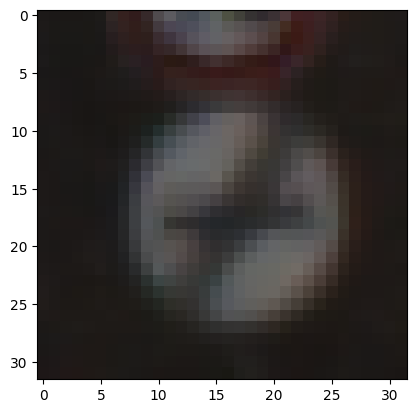

In [98]:
plt.imshow(trainX[0])

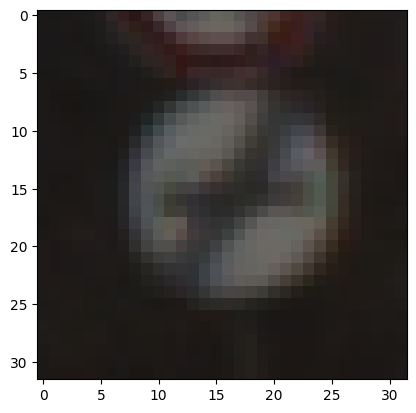

In [99]:
plt.imshow(trainX[1])

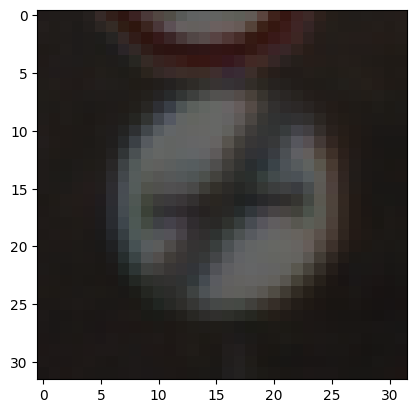

In [100]:
plt.imshow(trainX[10])

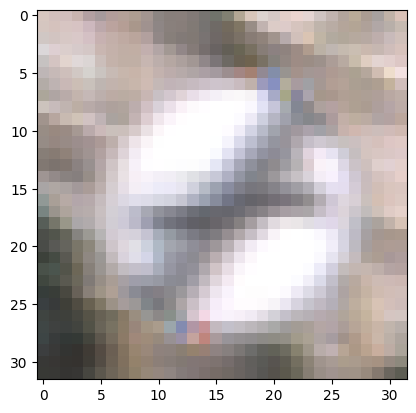

In [101]:
plt.imshow(trainX[50])

In [102]:
trainY[50]

41

In [103]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [104]:
classNames[trainY[50]]

'End of no passing'

In [105]:
from sklearn.utils import shuffle

In [106]:
# Tại sao phải tráo bộ dữ liệu hiện tại, bởi vì các ảnh tương đồng nhau đang được liền nhau, cho nên để tăng tính ngẫu nhiên của dữ liệu ta phải tráo chúng lên.
trainX, trainY = shuffle(trainX, trainY)

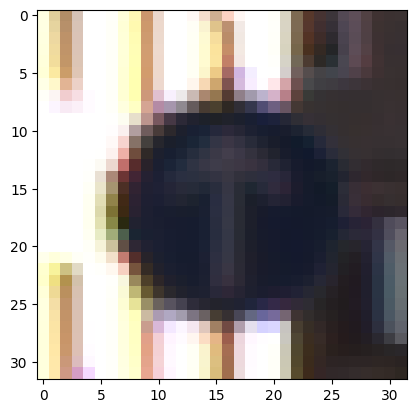

In [107]:
plt.imshow(trainX[0])

In [108]:
classNames[trainY[0]]

'Ahead only'

In [109]:
# bộ valid sử dụng để ktra bộ train trong khi traning
validX = valid["features"]
validY = valid["labels"]

In [110]:
# bộ test ktra bộ train sau khi training
testX = test["features"]
testY = test["labels"]

## **2. Normalization data**

In [111]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0


In [112]:
# 255
# 1
trainX[0]

array([[[1.        , 1.        , 0.88627451],
        [0.88235294, 0.81176471, 0.60784314],
        [0.69803922, 0.55294118, 0.40392157],
        ...,
        [0.24705882, 0.19607843, 0.19607843],
        [0.23137255, 0.19215686, 0.19215686],
        [0.23137255, 0.19607843, 0.19607843]],

       [[1.        , 1.        , 0.88627451],
        [0.90196078, 0.83137255, 0.62352941],
        [0.71764706, 0.56470588, 0.41568627],
        ...,
        [0.23921569, 0.19607843, 0.19215686],
        [0.22745098, 0.19215686, 0.19215686],
        [0.21960784, 0.18823529, 0.19215686]],

       [[1.        , 1.        , 0.87843137],
        [0.92941176, 0.84705882, 0.63137255],
        [0.74117647, 0.57254902, 0.41176471],
        ...,
        [0.23921569, 0.19215686, 0.19607843],
        [0.22352941, 0.18823529, 0.19215686],
        [0.21960784, 0.18823529, 0.19607843]],

       ...,

       [[1.        , 1.        , 0.8627451 ],
        [1.        , 0.90588235, 0.65490196],
        [0.78823529, 0

In [113]:
from sklearn.preprocessing import LabelBinarizer

In [114]:
lb = LabelBinarizer()

In [115]:
trainY = lb.fit_transform(trainY)

In [116]:
validY = lb.fit_transform(validY)

In [117]:
valid["labels"]

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [118]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## **3. Building model**

In [119]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [120]:
model = Sequential()

In [121]:
width = 32
height = 32
classes = 43

In [122]:
shape = (width, height, 3)

In [123]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                     

In [125]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [126]:
learning_rate = 0.01

In [127]:
epochs = 10
batch_size = 64

In [128]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [129]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [130]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(validX, validY),
                        steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10


<ipython-input-130-1da1854fd154>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


543/543 [==============================] - 244s 446ms/step - loss: 2.1079 - accuracy: 0.3935 - val_loss: 1.9247 - val_accuracy: 0.4653
Epoch 2/10
543/543 [==============================] - 232s 427ms/step - loss: 0.8403 - accuracy: 0.7236 - val_loss: 1.1194 - val_accuracy: 0.6764
Epoch 3/10
543/543 [==============================] - 230s 423ms/step - loss: 0.4093 - accuracy: 0.8644 - val_loss: 0.8947 - val_accuracy: 0.7395
Epoch 4/10
543/543 [==============================] - 234s 431ms/step - loss: 0.2365 - accuracy: 0.9234 - val_loss: 0.8188 - val_accuracy: 0.7782
Epoch 5/10
543/543 [==============================] - 235s 433ms/step - loss: 0.1679 - accuracy: 0.9448 - val_loss: 0.6386 - val_accuracy: 0.8356
Epoch 6/10
543/543 [==============================] - 236s 434ms/step - loss: 0.1222 - accuracy: 0.9619 - val_loss: 0.5873 - val_accuracy: 0.8517
Epoch 7/10
543/543 [==============================] - 235s 432ms/step - loss: 0.0999 - accuracy: 0.9681 - val_loss: 0.6136 - val_accura

## **4. Save and load model for more inference**

In [134]:
model.save('/content/drive/MyDrive/ColabNotebooks/DL/model1')

In [135]:
saved_model = tf.keras.models.load_model("/content/drive/MyDrive/ColabNotebooks/DL/model1")

In [136]:
result = saved_model.predict(testX[100:101])

1/1 [==============================] - 0s 182ms/step


In [137]:
result

array([[5.32949125e-05, 9.93159413e-01, 1.12347732e-06, 1.75811834e-07,
        6.38201300e-06, 4.99459493e-05, 1.87758516e-07, 5.94726391e-03,
        2.09808364e-04, 2.06237000e-05, 2.83894622e-07, 2.27476867e-05,
        2.07640642e-08, 3.26215991e-06, 1.94615225e-07, 5.60664773e-07,
        3.06618516e-04, 2.08453717e-08, 9.25260579e-08, 2.62503659e-06,
        3.07029921e-08, 6.74522411e-08, 1.56827866e-07, 4.39025371e-07,
        2.09130434e-07, 6.00512521e-06, 7.29416030e-08, 8.77187887e-08,
        7.33566558e-05, 1.48330130e-08, 3.70378052e-06, 4.37849340e-10,
        1.01856735e-07, 1.16966795e-07, 4.31639592e-06, 1.84015221e-06,
        5.06194192e-06, 9.91089109e-05, 7.15345413e-06, 6.75991956e-08,
        9.68826352e-10, 2.20678359e-07, 1.32806463e-05]], dtype=float32)

In [138]:
import numpy as np

In [139]:
final = np.argmax(result)

In [140]:
final = classNames[final]

In [141]:
final

'Speed limit (30km/h)'

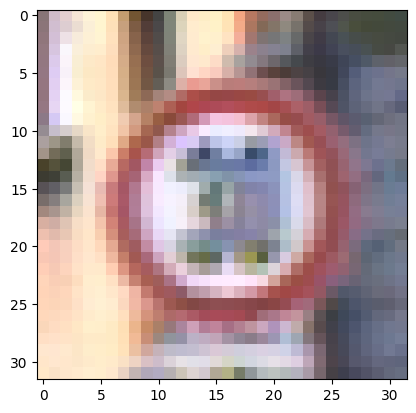

In [142]:
plt.imshow(test["features"][100])